# **Business Use Case 3**



## Helping Customer Support team to reach out to customers with abnormal behaviors from their usual spending patterns (anomaly detection)


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0. Import Packages

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List the contents of the current directory
directory_contents = os.listdir(current_directory)

# Print the directory contents
print(directory_contents)

['.config', 'drive', 'sample_data']


In [ ]:
!pip install -r https://raw.githubusercontent.com/phuonganh-38/transaction-analysis-ML/main/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
import csv
import os
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",500)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.   Load Dataset

In [ ]:
# Merge all transactions
data_folder = '/content/drive/My Drive/Transaction Analysis - ML/Transactions'

data = []

for file_csv in os.listdir(data_folder):
    if file_csv.endswith('.csv'):
        file_path = os.path.join(data_folder, file_csv)
        features = pd.read_csv(file_path, sep='|')
        data.append(features)

transactions = pd.concat(data, ignore_index=True)
print(transactions)

                   cc_num      acct_num                         trans_num  \
0           4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1           4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2           4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3           4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4           4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                   ...           ...                               ...   
4260899  4413395479406453  929002904576  660c294fe8d540431cc54d25077dc4d1   
4260900  4413395479406453  929002904576  4be02c8434ff59abf1d72f2b8372be0f   
4260901  4413395479406453  929002904576  0b9f714b93b5b1369cdd4fbbc111297d   
4260902  4413395479406453  929002904576  db1d2149e9c939413b0a33b672b496f2   
4260903  4413395479406453  929002904576  fa5d1154d8add5ac13931ab0008df642   

          unix_time       category    amt is_fraud        merchant  merch_l

In [ ]:
# Load customers dataset
# Define the function to separate values into columns
def separate_values(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='|')
        columns = next(reader)  # Get the column names from the first row
        data = list(reader)     # Get the remaining rows as data

    return columns, data

# File URL
file_url = '/content/drive/My Drive/Transaction Analysis - ML/customers.csv'

# Call the function to separate values into columns
columns, data = separate_values(file_url)

# Convert data into a DataFrame
customers = pd.DataFrame(data, columns=columns)
customers

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.268,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,1993-08-31,201218361926
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.648,-119.4487,27152,Software engineer,1982-05-27,921460407733
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,1999-05-14,499348764671
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,1994-02-23,617852071065


In [ ]:
# Remove spaces from 'cc_num' and 'acct_num' column
transactions['cc_num'] = transactions['cc_num'].replace(' ', '')
customers['cc_num'] = customers['cc_num'].replace(' ', '')
transactions['acct_num'] = transactions['acct_num'].replace(' ', '')
customers['acct_num'] = customers['acct_num'].replace(' ', '')

#Astype 'cc_num' and 'acct_num'
transactions['cc_num'] = transactions['cc_num'].astype(float)
transactions['acct_num'] = transactions['acct_num'].astype(float)
customers['cc_num'] = customers['cc_num'].astype(float)
customers['acct_num'] = customers['acct_num'].astype(float)

In [ ]:
#Merge dataset
df = transactions.merge(customers, how='left', on=['cc_num', 'acct_num'])
df

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,4.218196e+12,8.880223e+11,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
1,4.218196e+12,8.880223e+11,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
2,4.218196e+12,8.880223e+11,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
3,4.218196e+12,8.880223e+11,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
4,4.218196e+12,8.880223e+11,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,4.413395e+15,9.290029e+11,660c294fe8d540431cc54d25077dc4d1,1670377413,kids_pets,2.89,0,Morris-Tran,34.687688,-118.891984,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19
4260900,4.413395e+15,9.290029e+11,4be02c8434ff59abf1d72f2b8372be0f,1664342570,home,9.63,0,Lopez PLC,34.381254,-117.017665,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19
4260901,4.413395e+15,9.290029e+11,0b9f714b93b5b1369cdd4fbbc111297d,1672056151,travel,1.78,0,Sanchez Ltd,33.151970,-118.836058,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19
4260902,4.413395e+15,9.290029e+11,db1d2149e9c939413b0a33b672b496f2,1668741851,kids_pets,8.18,0,Garcia PLC,33.925622,-118.417269,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19


2. Explore Dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      float64
 1   acct_num    float64
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
 10  ssn         object 
 11  first       object 
 12  last        object 
 13  gender      object 
 14  street      object 
 15  city        object 
 16  state       object 
 17  zip         object 
 18  lat         object 
 19  long        object 
 20  city_pop    object 
 21  job         object 
 22  dob         object 
dtypes: float64(5), object(18)
memory usage: 747.7+ MB


In [ ]:
df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob'],
      dtype='object')

In [ ]:
import  datetime

In [ ]:
df['time_stamp'] = pd.to_datetime(df['unix_time'], unit='s')

In [ ]:
df["time_stamp"]

,time_stamp
0,2019-05-24 17:39:10
1,2019-09-25 15:31:59
2,2019-12-24 16:40:01
3,2019-10-18 19:50:38
4,2019-02-10 23:13:20
...,...
4260899,2022-12-07 01:43:33
4260900,2022-09-28 05:22:50
4260901,2022-12-26 12:02:31
4260902,2022-11-18 03:24:11


In [ ]:
df['year'] = df['time_stamp'].dt.year
df['month'] = df['time_stamp'].dt.month
df['day'] = df['time_stamp'].dt.day
df['hour'] = df['time_stamp'].dt.hour



In [ ]:
df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,time_stamp,year,month,day,hour
0,4.218196e+12,8.880223e+11,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-05-24 17:39:10,2019,5,24,17
1,4.218196e+12,8.880223e+11,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-09-25 15:31:59,2019,9,25,15
2,4.218196e+12,8.880223e+11,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-12-24 16:40:01,2019,12,24,16
3,4.218196e+12,8.880223e+11,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-10-18 19:50:38,2019,10,18,19
4,4.218196e+12,8.880223e+11,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-02-10 23:13:20,2019,2,10,23


In [ ]:
df = df.drop("unix_time", axis =1)
df

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,time_stamp,year,month,day,hour
0,4.218196e+12,8.880223e+11,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-05-24 17:39:10,2019,5,24,17
1,4.218196e+12,8.880223e+11,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-09-25 15:31:59,2019,9,25,15
2,4.218196e+12,8.880223e+11,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-12-24 16:40:01,2019,12,24,16
3,4.218196e+12,8.880223e+11,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-10-18 19:50:38,2019,10,18,19
4,4.218196e+12,8.880223e+11,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-02-10 23:13:20,2019,2,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,4.413395e+15,9.290029e+11,660c294fe8d540431cc54d25077dc4d1,kids_pets,2.89,0,Morris-Tran,34.687688,-118.891984,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19,2022-12-07 01:43:33,2022,12,7,1
4260900,4.413395e+15,9.290029e+11,4be02c8434ff59abf1d72f2b8372be0f,home,9.63,0,Lopez PLC,34.381254,-117.017665,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19,2022-09-28 05:22:50,2022,9,28,5
4260901,4.413395e+15,9.290029e+11,0b9f714b93b5b1369cdd4fbbc111297d,travel,1.78,0,Sanchez Ltd,33.151970,-118.836058,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19,2022-12-26 12:02:31,2022,12,26,12
4260902,4.413395e+15,9.290029e+11,db1d2149e9c939413b0a33b672b496f2,kids_pets,8.18,0,Garcia PLC,33.925622,-118.417269,064-48-2113,Cindy,Frazier,F,790 Sharp Crossing Apt. 898,West Covina,CA,91791,34.0653,-117.8978,108175,Occupational therapist,1966-06-19,2022-11-18 03:24:11,2022,11,18,3


In [ ]:
df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'category', 'amt', 'is_fraud',
       'merchant', 'merch_lat', 'merch_long', 'ssn', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'time_stamp', 'year', 'month', 'day', 'hour'],
      dtype='object')

### 3. Explore Target variable

### 4. Explore Variables of Interest

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 27 columns):
 #   Column      Dtype         
---  ------      -----         
 0   cc_num      float64       
 1   acct_num    float64       
 2   trans_num   object        
 3   category    object        
 4   amt         float64       
 5   is_fraud    object        
 6   merchant    object        
 7   merch_lat   float64       
 8   merch_long  float64       
 9   ssn         object        
 10  first       object        
 11  last        object        
 12  gender      object        
 13  street      object        
 14  city        object        
 15  state       object        
 16  zip         object        
 17  lat         object        
 18  long        object        
 19  city_pop    object        
 20  job         object        
 21  dob         object        
 22  time_stamp  datetime64[ns]
 23  year        int32         
 24  month       int32         
 25  day         int32 

In [ ]:

from sklearn.ensemble import IsolationForest

In [ ]:
# Ensure 'city_pop' is in the correct numerical format
df['city_pop'] = pd.to_numeric(df['city_pop'], errors='coerce')

# Select relevant features for Isolation Forest
isolation_forest_features = df[['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'city_pop']]

# Drop rows with missing values in the selected features
isolation_forest_features = isolation_forest_features.dropna()

# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
model.fit(isolation_forest_features)

# Predict anomalies
df['anomaly'] = model.predict(isolation_forest_features)

# Map the anomaly predictions: -1 for anomaly, 1 for normal
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Display the data with anomaly labels
print(df[['trans_num', 'amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'city_pop', 'anomaly']].head())

# Filter out the anomalous transactions
anomalous_transactions = df[df['anomaly'] == 1]

# Display the anomalous transactions with transaction number, names, and credit card number
print(anomalous_transactions[['trans_num', 'cc_num', 'first', 'last', 'amt', 'time_stamp']])


                          trans_num    amt  merch_lat  merch_long  year  \
0  91ab12e73ef38206e1121e9648d2408d  69.12  39.491416  -75.588522  2019   
1  071553d533a6822a4431c354c434ddcb  68.11  40.890319  -75.573359  2019   
2  0cfad38ef15e4749eff68dc83f62c151  40.35  39.244958  -74.475327  2019   
3  5782693d7c70f062f258cb30bfa8900f  96.22  39.656925  -75.802342  2019   
4  35fd7db657d7e30dd608c37f7798186e  71.89  40.313342  -74.220434  2019   

   month  day  hour  city_pop  anomaly  
0      5   24    17     32412        0  
1      9   25    15     32412        0  
2     12   24    16     32412        0  
3     10   18    19     32412        0  
4      2   10    23     32412        0  
                                trans_num        cc_num     first      last  \
3668     9a506e0d0ce6f6a6d16add62c17e9529  4.238850e+15   Brandon  Williams   
4190     55bf281bbd57d81c9f111cc7d18c02f4  4.238850e+15   Brandon  Williams   
6821     a1e97fc00f5f6daef5a85c30ed7f9f63  3.573467e+15    Joseph 

In [ ]:
anomaly_scores = model.decision_function(isolation_forest_features)

# Add the anomaly scores to the dataframe
df['anomaly_score'] = anomaly_scores

# Display the data with anomaly scores
print(df[['trans_num', 'amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'city_pop', 'anomaly', 'anomaly_score']].head())


                          trans_num    amt  merch_lat  merch_long  year  \
0  91ab12e73ef38206e1121e9648d2408d  69.12  39.491416  -75.588522  2019   
1  071553d533a6822a4431c354c434ddcb  68.11  40.890319  -75.573359  2019   
2  0cfad38ef15e4749eff68dc83f62c151  40.35  39.244958  -74.475327  2019   
3  5782693d7c70f062f258cb30bfa8900f  96.22  39.656925  -75.802342  2019   
4  35fd7db657d7e30dd608c37f7798186e  71.89  40.313342  -74.220434  2019   

   month  day  hour  city_pop  anomaly  anomaly_score  
0      5   24    17     32412        0       0.171120  
1      9   25    15     32412        0       0.167320  
2     12   24    16     32412        0       0.153781  
3     10   18    19     32412        0       0.156724  
4      2   10    23     32412        0       0.124699  


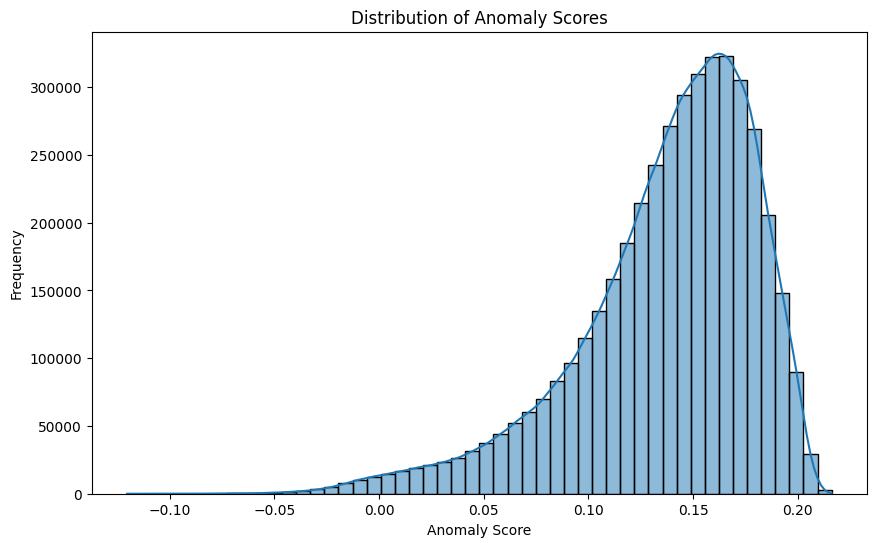

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(df['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


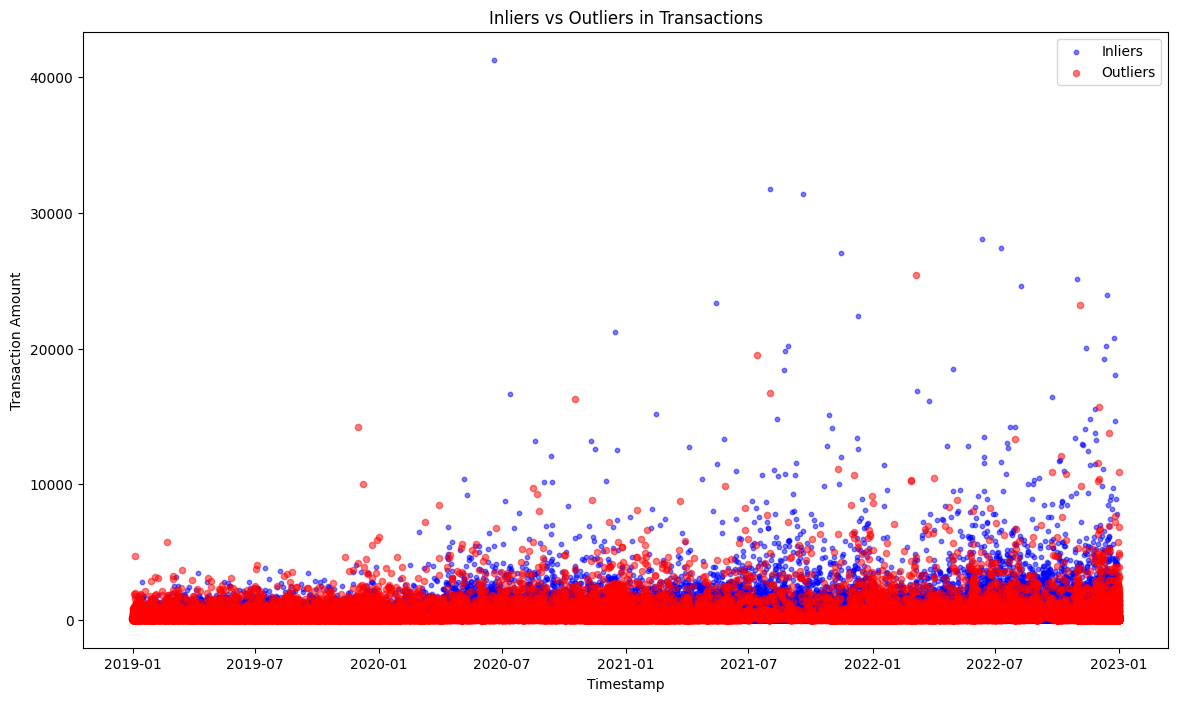

In [ ]:

# Separate inliers and outliers
inliers = df[df['anomaly'] == 0]
outliers = df[df['anomaly'] == 1]

# Plot inliers vs outliers
plt.figure(figsize=(14, 8))

# Plot inliers
plt.scatter(inliers['time_stamp'], inliers['amt'], color='blue', label='Inliers', alpha=0.5, s=10)

# Plot outliers
plt.scatter(outliers['time_stamp'], outliers['amt'], color='red', label='Outliers', alpha=0.5, s=20)

plt.title('Inliers vs Outliers in Transactions')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()

In [ ]:
df.head()

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,time_stamp,year,month,day,hour,anomaly,anomaly_score
0,4.218196e+12,8.880223e+11,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-05-24 17:39:10,2019,5,24,17,0,0.171120
1,4.218196e+12,8.880223e+11,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-09-25 15:31:59,2019,9,25,15,0,0.167320
2,4.218196e+12,8.880223e+11,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-12-24 16:40:01,2019,12,24,16,0,0.153781
3,4.218196e+12,8.880223e+11,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-10-18 19:50:38,2019,10,18,19,0,0.156724
4,4.218196e+12,8.880223e+11,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,115-04-4507,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,2019-02-10 23:13:20,2019,2,10,23,0,0.124699


In [ ]:
# Display the anomalous transactions with transaction number, names, and credit card number
anomalous_transactions = df[df['anomaly'] == 1]

# Select relevant columns
anomalous_info = anomalous_transactions[['trans_num', 'cc_num', 'first', 'last', 'amt', 'time_stamp']]

# Display the anomalous transactions
print(anomalous_info.head())


                             trans_num        cc_num    first      last  \
3668  9a506e0d0ce6f6a6d16add62c17e9529  4.238850e+15  Brandon  Williams   
4190  55bf281bbd57d81c9f111cc7d18c02f4  4.238850e+15  Brandon  Williams   
6821  a1e97fc00f5f6daef5a85c30ed7f9f63  3.573467e+15   Joseph   Meadows   
6936  d85699031710375ba4c9786c8c756725  3.573467e+15   Joseph   Meadows   
7085  f74bcf1c6df61c8e1737a20f20d758bd  3.573467e+15   Joseph   Meadows   

          amt          time_stamp  
3668  1280.89 2019-05-29 23:42:38  
4190  1264.04 2019-04-26 16:30:35  
6821   693.87 2019-02-07 16:25:03  
6936   680.45 2019-12-14 00:52:49  
7085   999.77 2021-05-10 23:11:08  


<ipython-input-26-a720441b8176>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['date'] = outliers['time_stamp'].dt.date


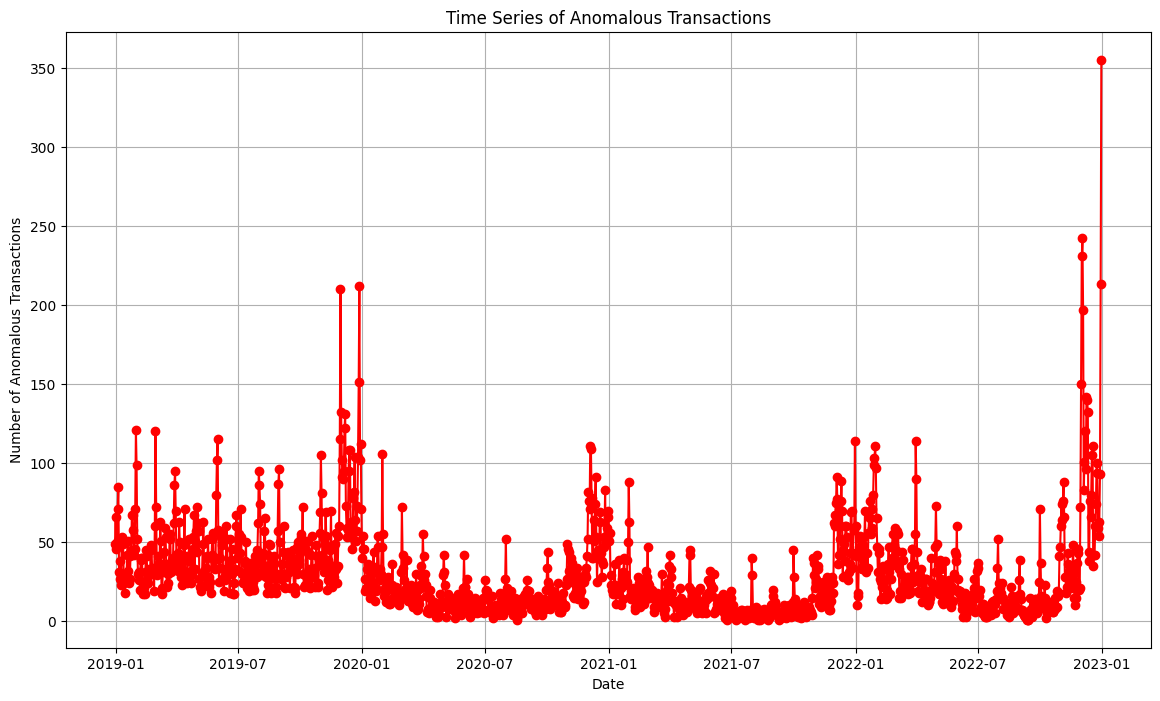

In [ ]:
# Time series graph of anomalous transactions
# Aggregate the number of anomalous transactions per day
outliers['date'] = outliers['time_stamp'].dt.date
daily_anomalies = outliers.groupby('date').size().reset_index(name='anomalous_count')

# Plot the time series of anomalous transactions
plt.figure(figsize=(14, 8))
plt.plot(daily_anomalies['date'], daily_anomalies['anomalous_count'], marker='o', linestyle='-', color='red')
plt.title('Time Series of Anomalous Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Anomalous Transactions')
plt.grid(True)
plt.show()

Distribution of Anomalous Transactions by Amount

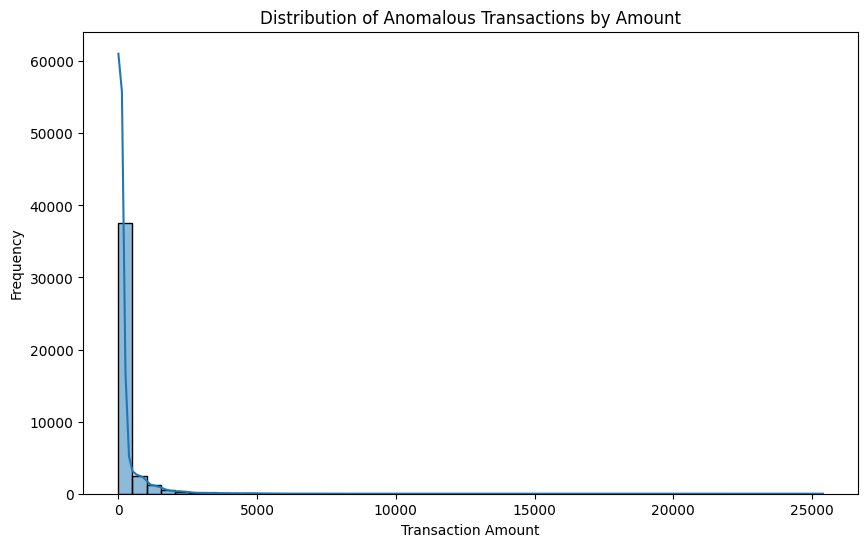

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anomalous_transactions['amt'], bins=50, kde=True)
plt.title('Distribution of Anomalous Transactions by Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Heatmap of Anomalous Transactions by Time (Hour and Day)

<ipython-input-28-ec26142a3f2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_transactions['day_of_week'] = anomalous_transactions['time_stamp'].dt.day_name()
<ipython-input-28-ec26142a3f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_transactions['hour'] = anomalous_transactions['time_stamp'].dt.hour


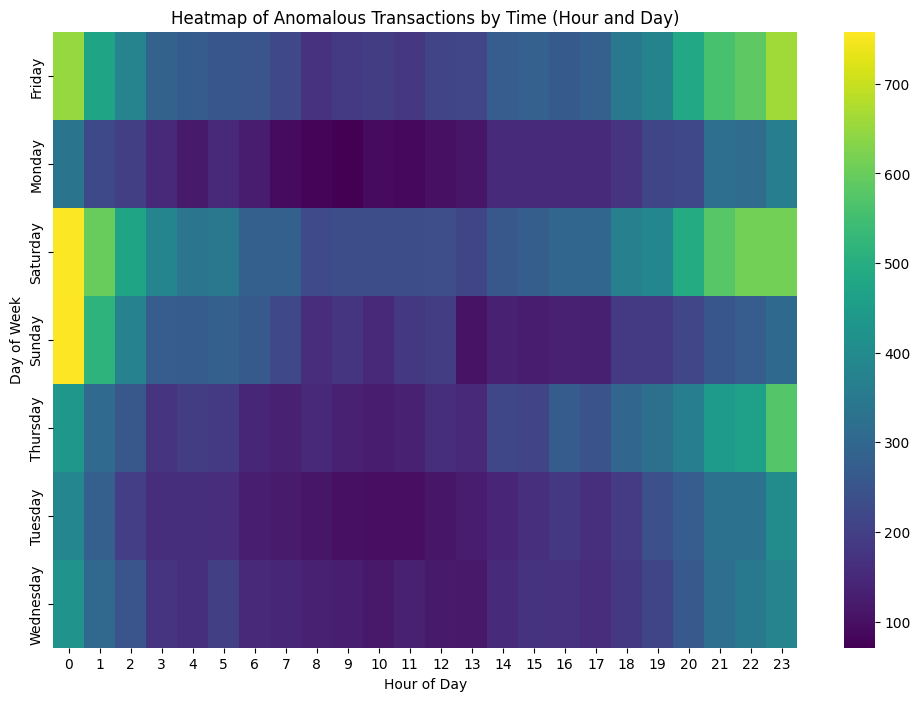

In [ ]:
plt.figure(figsize=(12, 8))
anomalous_transactions['day_of_week'] = anomalous_transactions['time_stamp'].dt.day_name()
anomalous_transactions['hour'] = anomalous_transactions['time_stamp'].dt.hour

heatmap_data = anomalous_transactions.pivot_table(index='day_of_week', columns='hour', values='trans_num', aggfunc='count')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Anomalous Transactions by Time (Hour and Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


Bar Plot of Anomalous Transactions by Category

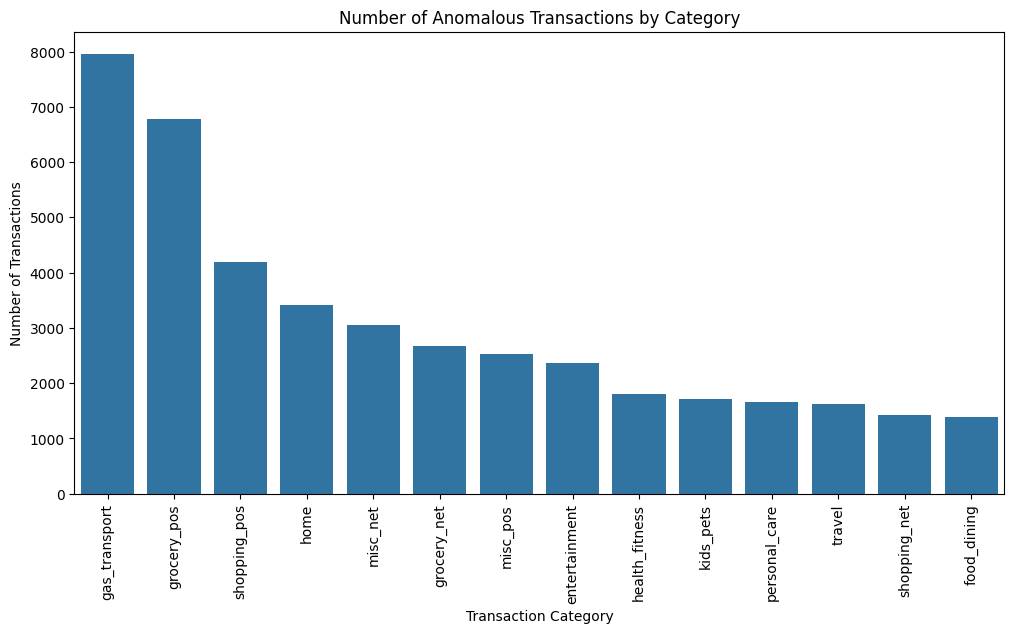

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=anomalous_transactions, x='category', order=anomalous_transactions['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Anomalous Transactions by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.show()


Box Plot of Transaction Amounts by Category

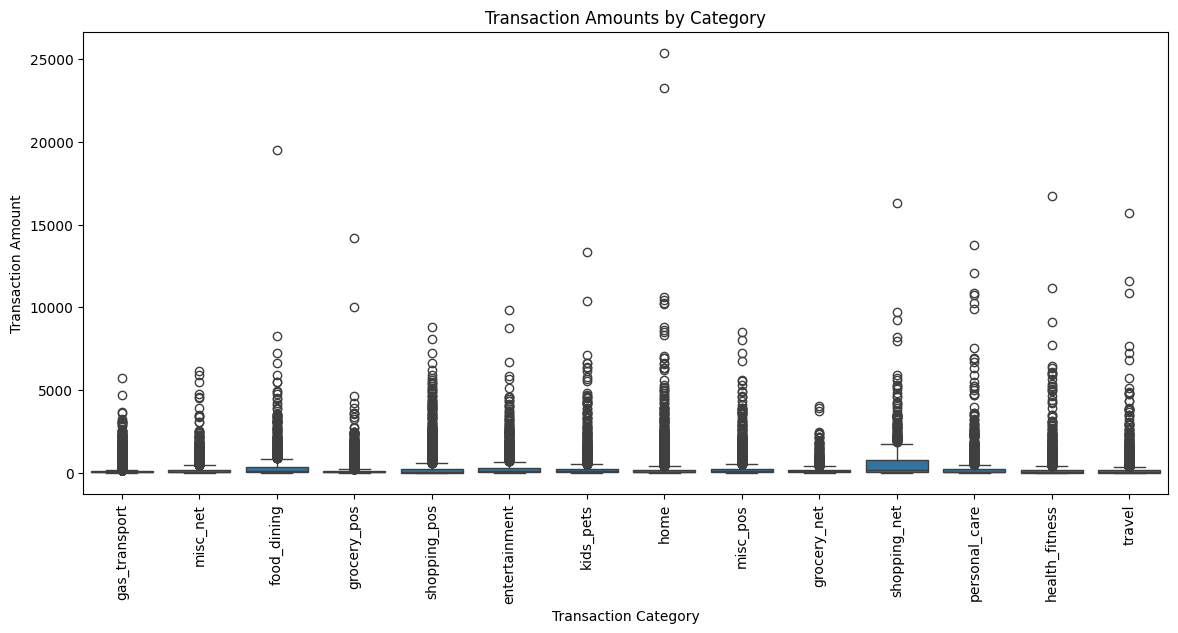

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=anomalous_transactions, x='category', y='amt')
plt.xticks(rotation=90)
plt.title('Transaction Amounts by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.show()


# Identify Most Suspicious Individuals

In [ ]:
# Group by customer details and count anomalous transactions
suspicious_individuals = anomalous_transactions.groupby(['cc_num', 'first', 'last']).size().reset_index(name='anomalous_count')

# Sort by the number of anomalous transactions
suspicious_individuals = suspicious_individuals.sort_values(by='anomalous_count', ascending=False)

# Display the most suspicious individuals
print(suspicious_individuals.head(10))


           cc_num    first      last  anomalous_count
111  3.029546e+13   Steven    Hoover             4121
279  2.687018e+15    Sonia  Mitchell             3876
198  2.131867e+14   Amanda     Brady             2816
356  3.559229e+15  Douglas  Williams             2728
216  3.454824e+14    Heidi   Goodwin             2341
329  3.534679e+15      Amy   Johnson             2246
477  4.696905e+15   Austin  Williams             2125
50   4.027868e+12  Whitney  Mitchell             1892
464  4.570900e+15  Carolyn    Wilcox             1655
370  3.582661e+15  Jeffrey    Fisher             1601


## Building an AutoEncoder Model

In [ ]:
from sklearn.preprocessing import StandardScaler
# Select relevant features for Autoencoder
features = df[['amt', 'merch_lat', 'merch_long', 'year', 'month', 'day', 'hour', 'city_pop']]

# Drop rows with missing values in the selected features
features = features.dropna()

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and test sets
train_size = int(0.8 * len(features_scaled))
train_data = features_scaled[:train_size]
test_data = features_scaled[train_size:]

In [ ]:
# building at architecture
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder architecture
input_dim = train_data.shape[1]
encoding_dim = 4  # Dimensionality of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.8212 - val_loss: 0.7187
Epoch 2/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.6851 - val_loss: 0.7133
Epoch 3/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.6884 - val_loss: 0.7125
Epoch 4/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.6826 - val_loss: 0.7120
Epoch 5/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.6800 - val_loss: 0.7119
Epoch 6/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.6860 - val_loss: 0.7117
Epoch 7/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.6926 - val_loss: 0.7119
Epoch 8/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.6794 - val_loss: 0.7116
Epoch 9/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.6858 - val_loss: 0.7116
Epoch 10/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.6801 - val_loss: 0.7115
Epoch 11/50
10653/10653 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.6840 - val_loss: 0.71

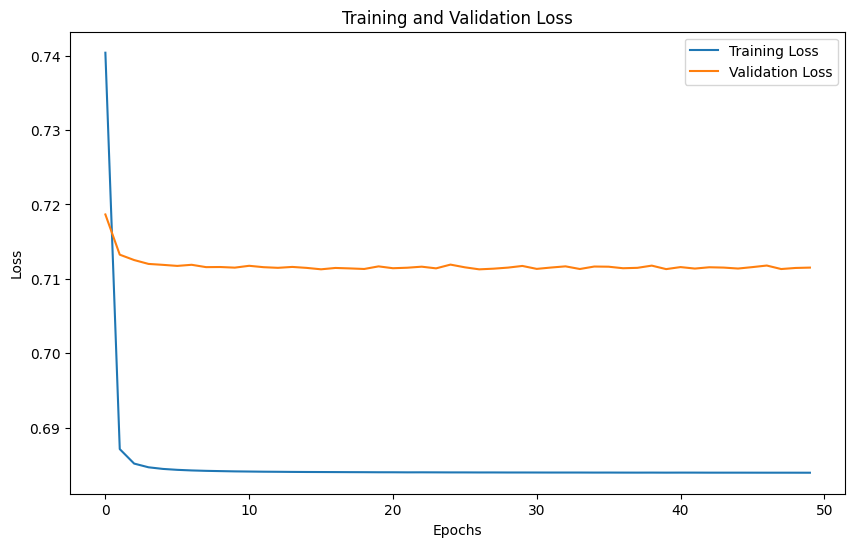

In [ ]:
# Train the autoencoder
history = autoencoder.fit(train_data, train_data,
                          epochs=50,
                          batch_size=256,
                          validation_split=0.2,
                          shuffle=True)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


26631/26631 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step


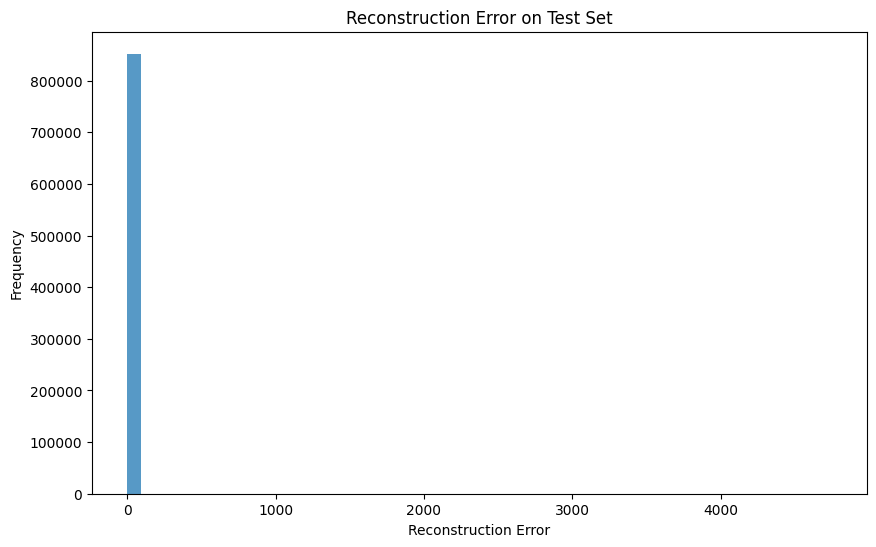

Threshold for anomaly detection: 1.4946845559170734
               cc_num      acct_num                         trans_num  \
3409489  3.791477e+14  5.863083e+11  fe5d34d0261da6e6effe8ce0eb3f14a9   
3409497  3.791477e+14  5.863083e+11  82538a26753cacd54c341b7a4ccdc639   
3409520  3.791477e+14  5.863083e+11  4a21c0cc870ef69f5880546515cfbeff   
3409539  3.791477e+14  5.863083e+11  99dee737fc5ae2cee16f03c2b38eab2a   
3409586  3.791477e+14  5.863083e+11  a0f981f0d75b68e8ff2d2ec7f7a31fd8   
...               ...           ...                               ...   
4260495  4.413395e+15  9.290029e+11  0ef4dc25abfb3ef3203e2d41c5d767e5   
4260519  4.413395e+15  9.290029e+11  341c04ad45c634b0be2403c1ce46894d   
4260529  4.413395e+15  9.290029e+11  8f6f16baeef58a3724f437d6869cddd2   
4260539  4.413395e+15  9.290029e+11  aebdd88a89720adcad966e5f3551bed6   
4260570  4.413395e+15  9.290029e+11  65cc24b67eccd70f45ad38c3605d4c3f   

               category      amt is_fraud                    merchant  

In [ ]:
# evalutaing the model
# Calculate reconstruction error on the test set
reconstructed_test_data = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - reconstructed_test_data, 2), axis=1)

# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.75)
plt.title('Reconstruction Error on Test Set')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)
print(f'Threshold for anomaly detection: {threshold}')

# Identify anomalies
anomalies = mse > threshold

# Add anomalies to the original test data
test_data_with_anomalies = df.iloc[train_size:].copy()
test_data_with_anomalies['anomaly'] = anomalies

# Display anomalies
print(test_data_with_anomalies[test_data_with_anomalies['anomaly'] == True])


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



# Ensure 'is_fraud' is in the correct format
df['is_fraud'] = df['is_fraud'].astype(int)

# Add the 'is_fraud' column to the test_data_with_anomalies DataFrame
test_data_with_anomalies['is_fraud'] = df.iloc[train_size:]['is_fraud']

# Calculate the confusion matrix
y_true = test_data_with_anomalies['is_fraud']
y_pred = test_data_with_anomalies['anomaly'].astype(int)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(f'True Positives (TP): {tp}')
print(f'False Positives (FP): {fp}')
print(f'True Negatives (TN): {tn}')
print(f'False Negatives (FN): {fn}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

True Positives (TP): 594
False Positives (FP): 42015
True Negatives (TN): 809085
False Negatives (FN): 487


In [ ]:
# Get all relevant information about the anomalous transactions detected by Autoencoder
anomalous_transactions_ae = test_data_with_anomalies[test_data_with_anomalies['anomaly'] == True]

# Select relevant columns
anomalous_info_ae = anomalous_transactions_ae[['trans_num', 'cc_num', 'first', 'last', 'amt', 'time_stamp', 'merchant', 'category']]
print("Anomalous Transactions Detected by Autoencoder:")
print(anomalous_info_ae.head())


Anomalous Transactions Detected by Autoencoder:
                                trans_num        cc_num     first   last  \
3409489  fe5d34d0261da6e6effe8ce0eb3f14a9  3.791477e+14  Patricia  Evans   
3409497  82538a26753cacd54c341b7a4ccdc639  3.791477e+14  Patricia  Evans   
3409520  4a21c0cc870ef69f5880546515cfbeff  3.791477e+14  Patricia  Evans   
3409539  99dee737fc5ae2cee16f03c2b38eab2a  3.791477e+14  Patricia  Evans   
3409586  a0f981f0d75b68e8ff2d2ec7f7a31fd8  3.791477e+14  Patricia  Evans   

             amt          time_stamp       merchant        category  
3409489  3158.04 2022-10-14 03:30:36   Sullivan PLC   personal_care  
3409497   979.79 2022-12-07 12:59:55    Kane-Cooley          travel  
3409520  2614.10 2021-10-04 04:52:21  Bates-Sanchez  health_fitness  
3409539  1216.09 2022-11-12 05:50:10    Collins LLC   personal_care  
3409586   919.28 2021-12-20 02:59:20    Barry Group            home  


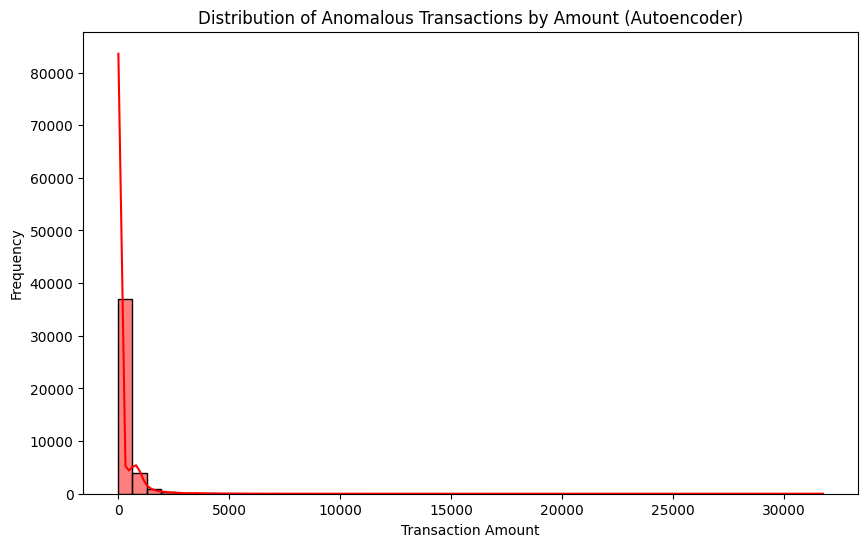

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anomalous_transactions_ae['amt'], bins=50, kde=True, color='red')
plt.title('Distribution of Anomalous Transactions by Amount (Autoencoder)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


<ipython-input-39-f14bfaafac8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_transactions_ae['day_of_week'] = anomalous_transactions_ae['time_stamp'].dt.day_name()
<ipython-input-39-f14bfaafac8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_transactions_ae['hour'] = anomalous_transactions_ae['time_stamp'].dt.hour


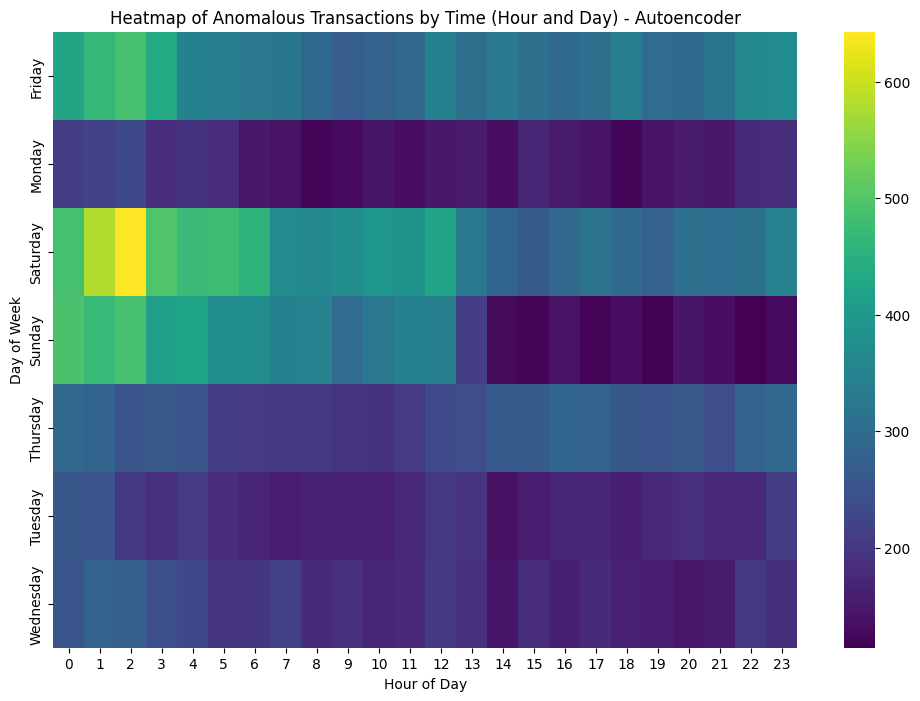

In [ ]:
plt.figure(figsize=(12, 8))
anomalous_transactions_ae['day_of_week'] = anomalous_transactions_ae['time_stamp'].dt.day_name()
anomalous_transactions_ae['hour'] = anomalous_transactions_ae['time_stamp'].dt.hour

heatmap_data_ae = anomalous_transactions_ae.pivot_table(index='day_of_week', columns='hour', values='trans_num', aggfunc='count')
sns.heatmap(heatmap_data_ae, cmap='viridis')
plt.title('Heatmap of Anomalous Transactions by Time (Hour and Day) - Autoencoder')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


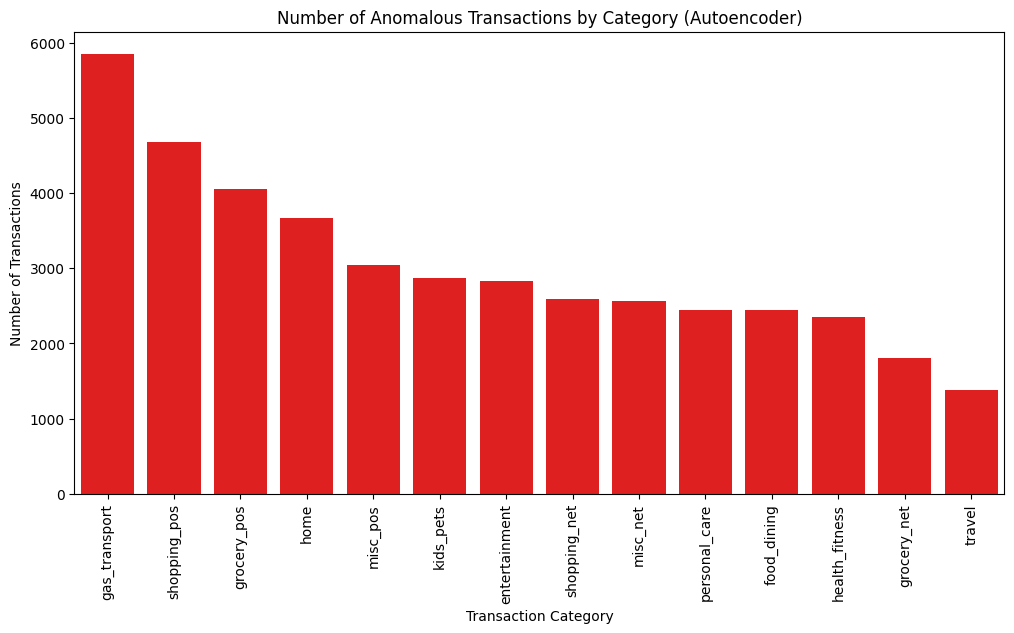

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=anomalous_transactions_ae, x='category', order=anomalous_transactions_ae['category'].value_counts().index, color='red')
plt.xticks(rotation=90)
plt.title('Number of Anomalous Transactions by Category (Autoencoder)')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.show()


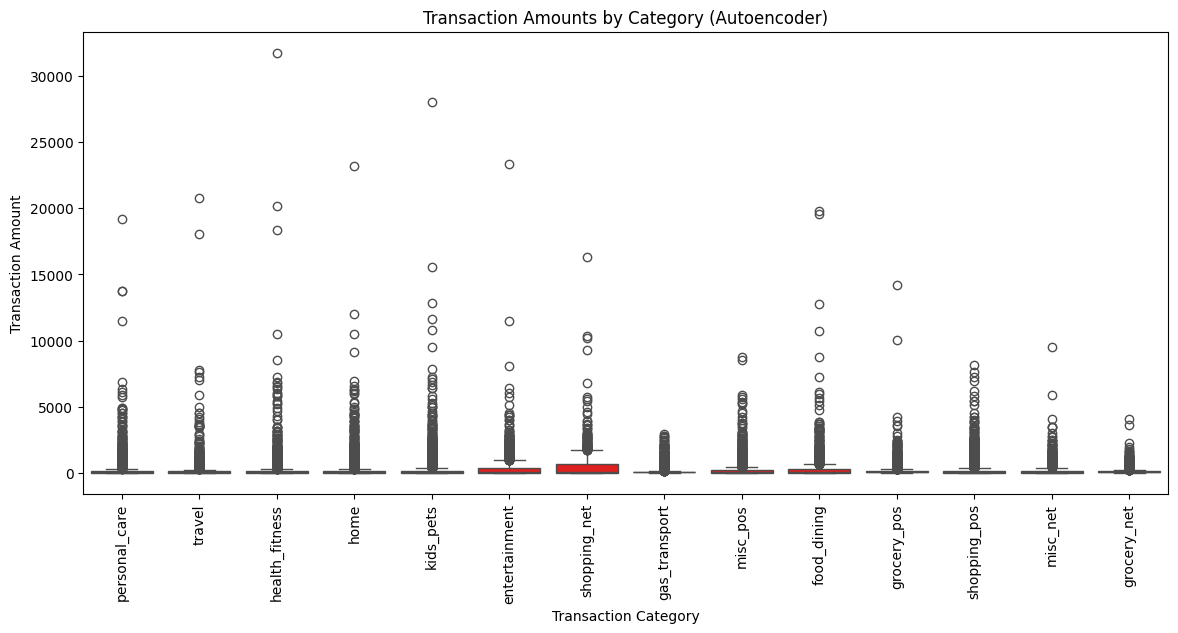

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=anomalous_transactions_ae, x='category', y='amt', color='red')
plt.xticks(rotation=90)
plt.title('Transaction Amounts by Category (Autoencoder)')
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.show()


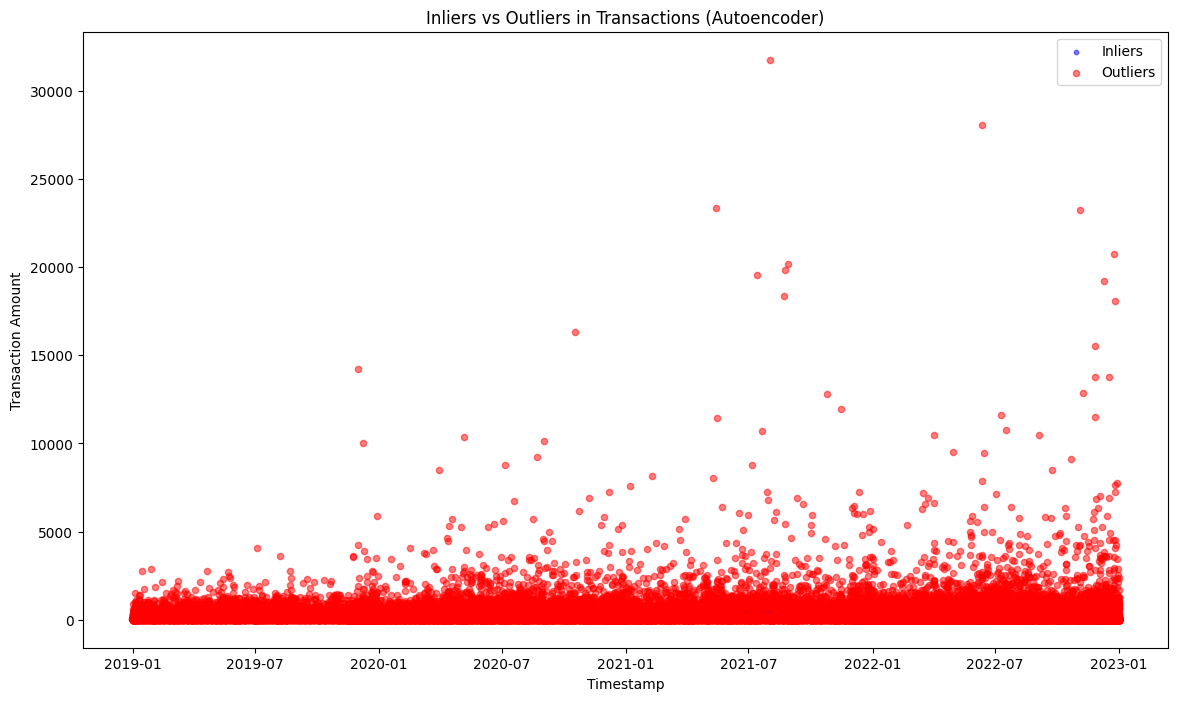

In [ ]:
# Define inliers and outliers based on the Autoencoder results
inliers_ae = test_data_with_anomalies[test_data_with_anomalies['anomaly'] == False]
outliers_ae = test_data_with_anomalies[test_data_with_anomalies['anomaly'] == True]

plt.figure(figsize=(14, 8))

# Plot inliers
plt.scatter(inliers_ae['time_stamp'], inliers_ae['amt'], color='blue', label='Inliers', alpha=0.5, s=10)

# Plot outliers
plt.scatter(outliers_ae['time_stamp'], outliers_ae['amt'], color='red', label='Outliers', alpha=0.5, s=20)

plt.title('Inliers vs Outliers in Transactions (Autoencoder)')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


<ipython-input-43-5f00bfe81a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_ae['date'] = outliers_ae['time_stamp'].dt.date


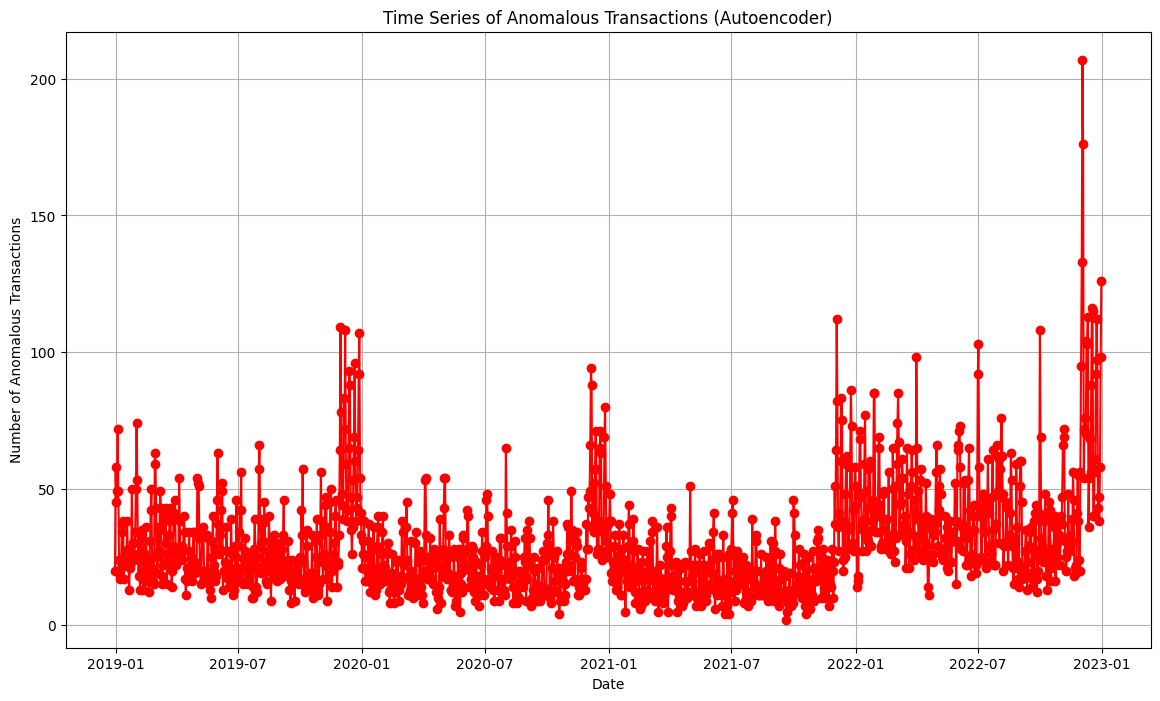

In [ ]:
outliers_ae['date'] = outliers_ae['time_stamp'].dt.date
daily_anomalies_ae = outliers_ae.groupby('date').size().reset_index(name='anomalous_count')

# Plot the time series of anomalous transactions
plt.figure(figsize=(14, 8))
plt.plot(daily_anomalies_ae['date'], daily_anomalies_ae['anomalous_count'], marker='o', linestyle='-', color='red')
plt.title('Time Series of Anomalous Transactions (Autoencoder)')
plt.xlabel('Date')
plt.ylabel('Number of Anomalous Transactions')
plt.grid(True)
plt.show()

In [ ]:
reconstructed_test_data = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - reconstructed_test_data, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)
print(f'Threshold for anomaly detection: {threshold}')

# Identify anomalies
anomalies = mse > threshold

# Add anomalies to the original test data
test_data_with_anomalies = df.iloc[train_size:].copy()
test_data_with_anomalies['anomaly_ae'] = anomalies

# Ensure the column was created correctly
print(test_data_with_anomalies.head())

26631/26631 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
Threshold for anomaly detection: 1.4946845559170734
               cc_num      acct_num                         trans_num  \
3408723  3.791477e+14  5.863083e+11  4665117a2498fa45c57763d1b9038e45   
3408724  3.791477e+14  5.863083e+11  206fd9b73e948db3be9c803eba0105df   
3408725  3.791477e+14  5.863083e+11  8867221edd8137453bd20d68c6c336ad   
3408726  3.791477e+14  5.863083e+11  78fa36464034186b1b8b0ba7af3684d1   
3408727  3.791477e+14  5.863083e+11  5dd4b61731bf2de1d8d8abedc1b61e8a   

              category     amt  is_fraud                    merchant  \
3408723      kids_pets  107.04         0   Lopez, Norman and Carroll   
3408724  personal_care   62.99         0    Hines, Madden and Flores   
3408725      kids_pets  143.00         0                    Ho-Kirby   
3408726  personal_care   88.40         0  Alvarado, Malone and Allen   
3408727    food_dining  127.68         0              Stewart-Wilcox   

         merch_lat  merch_long

## Isolation Forest

In [ ]:
# Group by customer details and count anomalous transactions
suspicious_individuals = anomalous_transactions.groupby(['cc_num', 'first', 'last']).size().reset_index(name='anomalous_count')

# Sort by the number of anomalous transactions
suspicious_individuals = suspicious_individuals.sort_values(by='anomalous_count', ascending=False)

# Display the most suspicious individuals
print(suspicious_individuals.head(10))


           cc_num    first      last  anomalous_count
111  3.029546e+13   Steven    Hoover             4121
279  2.687018e+15    Sonia  Mitchell             3876
198  2.131867e+14   Amanda     Brady             2816
356  3.559229e+15  Douglas  Williams             2728
216  3.454824e+14    Heidi   Goodwin             2341
329  3.534679e+15      Amy   Johnson             2246
477  4.696905e+15   Austin  Williams             2125
50   4.027868e+12  Whitney  Mitchell             1892
464  4.570900e+15  Carolyn    Wilcox             1655
370  3.582661e+15  Jeffrey    Fisher             1601


In [ ]:
# Extract information about the anomalous transactions detected by Autoencoder
anomalous_transactions_ae = test_data_with_anomalies[test_data_with_anomalies['anomaly_ae'] == True]
anomalous_info_ae = anomalous_transactions_ae[['trans_num', 'cc_num', 'first', 'last', 'amt', 'time_stamp', 'merchant', 'category']]


In [ ]:
# Group by customer details and count anomalous transactions for Autoencoder
suspicious_individuals_ae = anomalous_info_ae.groupby(['cc_num', 'first', 'last']).size().reset_index(name='anomalous_count_ae')

# Sort by the number of anomalous transactions
suspicious_individuals_ae = suspicious_individuals_ae.sort_values(by='anomalous_count_ae', ascending=False)
print("Most Suspicious Individuals Detected by Autoencoder:")
print(suspicious_individuals_ae.head(10))


Most Suspicious Individuals Detected by Autoencoder:
           cc_num      first      last  anomalous_count_ae
269  6.571589e+15     Sherry    Taylor                5367
106  2.131867e+14     Amanda     Brady                5096
271  6.580085e+15    Matthew   Compton                4380
80   1.800084e+14      Jason  Williams                3617
73   3.056999e+13      April   Collier                3379
224  4.570900e+15    Carolyn    Wilcox                2920
200  4.192134e+15       Erin    Ingram                2534
190  4.045462e+15     Jordan    Torres                1860
25   4.027079e+12  Mackenzie    Conway                1818
65   3.029343e+13     Robert    Duarte                 716


In [ ]:
comparison_df = pd.merge(suspicious_individuals, suspicious_individuals_ae, on=['cc_num', 'first', 'last'], how='outer').fillna(0)
comparison_df

,cc_num,first,last,anomalous_count,anomalous_count_ae
0,6.040027e+10,Eric,Gardner,6.0,11.0
1,6.042928e+10,Ethan,Massey,2.0,0.0
2,6.043220e+10,Justin,Gilbert,20.0,0.0
3,6.043496e+10,Lindsay,Cannon,213.0,0.0
4,6.045493e+10,Ronald,Robertson,4.0,0.0
...,...,...,...,...,...
713,4.966177e+18,Tina,Blair,2.0,0.0
714,4.967150e+18,Elizabeth,Miller,1.0,37.0
715,4.968828e+18,Summer,Davis,20.0,0.0
716,4.983666e+18,Emily,Cabrera,1.0,29.0


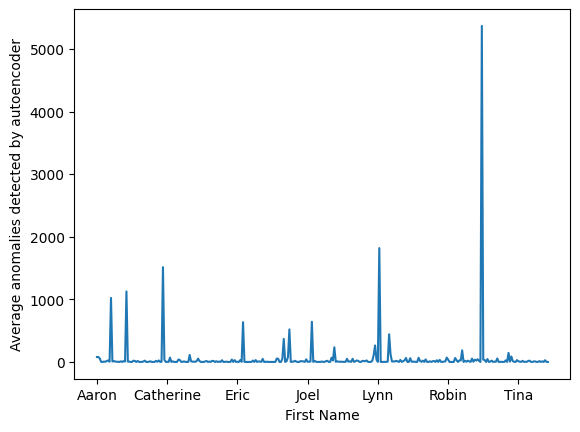

In [ ]:
# @title Average anomalies detected by autoencoder by customer

import matplotlib.pyplot as plt
comparison_df.groupby('first')['anomalous_count_ae'].mean().plot(kind='line')
plt.xlabel('First Name')
_ = plt.ylabel('Average anomalies detected by autoencoder')

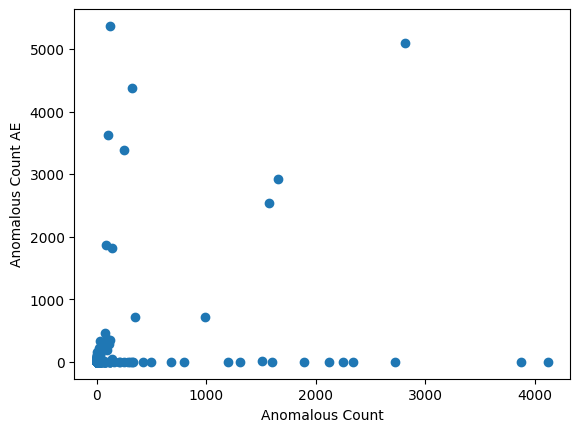

In [ ]:
# @title Anomalous count vs Anomalous count AE

import matplotlib.pyplot as plt
plt.scatter(comparison_df['anomalous_count'], comparison_df['anomalous_count_ae'])
plt.xlabel('Anomalous Count')
_ = plt.ylabel('Anomalous Count AE')

In [ ]:
comparison_df['difference'] = comparison_df['anomalous_count'] - comparison_df['anomalous_count_ae']
comparison_df = comparison_df.sort_values(by='difference', ascending=False)
print("Comparison of Most Suspicious Individuals Detected by Both Models:")
print(comparison_df.head(10))

Comparison of Most Suspicious Individuals Detected by Both Models:
           cc_num    first      last  anomalous_count  anomalous_count_ae  \
139  3.029546e+13   Steven    Hoover           4121.0                 0.0   
331  2.687018e+15    Sonia  Mitchell           3876.0                 0.0   
420  3.559229e+15  Douglas  Williams           2728.0                 0.0   
256  3.454824e+14    Heidi   Goodwin           2341.0                 0.0   
393  3.534679e+15      Amy   Johnson           2246.0                 0.0   
567  4.696905e+15   Austin  Williams           2125.0                 0.0   
59   4.027868e+12  Whitney  Mitchell           1892.0                 0.0   
436  3.582661e+15  Jeffrey    Fisher           1601.0                 0.0   
183  1.800407e+14     Adam  Espinoza           1505.0                12.0   
122  4.998480e+12  Tiffany      Holt           1311.0                 0.0   

     difference  
139      4121.0  
331      3876.0  
420      2728.0  
256      2341